In [1]:
import traci

SUMO_BINARY = r"C:\Program Files (x86)\Eclipse\Sumo\bin\sumo-gui"
CONFIG_FILE = r"C:\Program Files (x86)\Eclipse\Sumo\doc\tutorial\quickstart\data\quickstart.sumocfg"
# CONFIG_FILE = r"C:\Repos\rl_traffic_signal_optimization\models\20230718_sumo_ma\osm.sumocfg"

In [2]:
tripinfo_file_name = "tripinfo.xml"

In [3]:
sumo_cmd = [SUMO_BINARY, "-c", CONFIG_FILE, "--start", "--quit-on-end", "--tripinfo-output", tripinfo_file_name]

traci.start(sumo_cmd)

while traci.simulation.getMinExpectedNumber() > 0:
    traci.simulationStep()

In [4]:
traci.close()

In [6]:
from lxml import etree
import pandas as pd

root = etree.parse(tripinfo_file_name).getroot()
data = {"vehicles": [], "total_travel_seconds": []}

for t in root.iter("tripinfo"):
    data["vehicles"].append(t.get("id"))
    data["total_travel_seconds"].append(int(float(t.get("arrival")) - float(t.get("depart"))))

df = pd.DataFrame(data)

<Axes: ylabel='Count'>

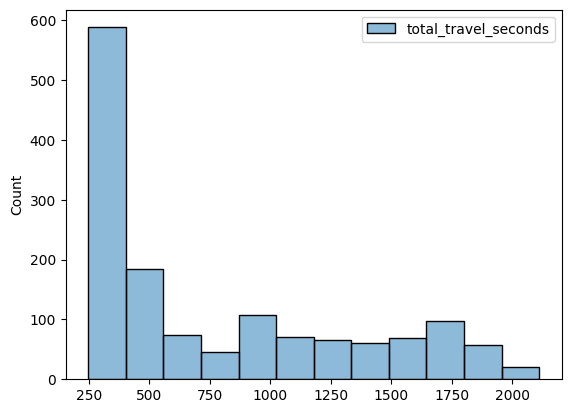

In [9]:
import seaborn as sns

sns.histplot(data)